# ANALISIS SENTIMEN CAPRES

- dataset : youtube Deinony
- link : https://youtu.be/PiOmqPUbYV0?si=njzn1CrvGNniZUkm

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re # regular expression

warnings.filterwarnings('ignore')

In [22]:
df = pd.read_csv('../MACHINE LEARNING YOUTUBE/dataset sentimen capres/anies.csv')
print('dimensi data',df.shape)
df.head()

dimensi data (515, 13)


Unnamed: 0                      created_at        id_str  \
0          0  Fri Dec 15 04:04:44 +0000 2023  1.735511e+18   
1          1  Fri Dec 15 04:04:33 +0000 2023  1.735511e+18   
2          2  Fri Dec 15 04:04:31 +0000 2023  1.735511e+18   
3          3  Fri Dec 15 04:04:27 +0000 2023  1.735511e+18   
4          4  Fri Dec 15 04:04:26 +0000 2023  1.735511e+18   

                                           full_text  quote_count reply_count  \
0  @dedy_pram Pastilah, Prabowo Anies nggak punya...          0.0           0   
1  Suasana pedesaan memang selalu menyenangkan......          0.0           0   
2  Program anies hanyalah mengubah nama rumah sak...          0.0           0   
3  @kumparan @aniesbaswedan anies... BERBOHONG DA...          0.0           0   
4  Tidak Bicara Sesuai Fakta! Anies Dengan Lantan...          0.0           0   

   retweet_count  favorite_count lang          user_id_str  \
0            0.0             0.0   in   797761417894051840   
1            0.0             0.0   in   936445409605459968   
2            0.0             0.0   in            768652236   
3            0.0             0.0   in  1710823909275410432   
4            1.0             1.0   in  1661757337554784264   

   conversation_id_str         username  \
0         1.735147e+18      MarahIchsan   
1         1.735511e+18       Agung_wiyo   
2         1.735511e+18       Alfakton_i   
3         1.735146e+18    justtheway333   
4         1.735511e+18  singgihabdrchmn   

                                           tweet_url  
0  https://twitter.com/MarahIchsan/status/1735511...  
1  https://twitter.com/Agung_wiyo/status/17355111...  
2  https://twitter.com/Alfakton_i/status/17355111...  
3  https://twitter.com/justtheway333/status/17355...  
4  https://twitter.com/singgihabdrchmn/status/173...

In [23]:
# seleksi kolom
df = df[['full_text','username','created_at']]
df

full_text         username  \
0    @dedy_pram Pastilah, Prabowo Anies nggak punya...      MarahIchsan   
1    Suasana pedesaan memang selalu menyenangkan......       Agung_wiyo   
2    Program anies hanyalah mengubah nama rumah sak...       Alfakton_i   
3    @kumparan @aniesbaswedan anies... BERBOHONG DA...    justtheway333   
4    Tidak Bicara Sesuai Fakta! Anies Dengan Lantan...  singgihabdrchmn   
..                                                 ...              ...   
510  Tiga untuk Indonesia lebih baik  .  tag || Gac...  TugimanPresiden   
511  @herculep638 Makanya susah memahami apa yg dis...      Pribumituan   
512  Buat Pak Anies ,bukankah anda saat itu yg KD G...   Kacaback678910   
513  Anies Baswedan, sosok pemimpin yang memahami b...        YKasmono4   
514  Anies Baswedan diharapkan dapat membawa peruba...  DediSudraj83464   

                         created_at  
0    Fri Dec 15 04:04:44 +0000 2023  
1    Fri Dec 15 04:04:33 +0000 2023  
2    Fri Dec 15 04:04:31 +0000 2023  
3    Fri Dec 15 04:04:27 +0000 2023  
4    Fri Dec 15 04:04:26 +0000 2023  
..                              ...  
510  Fri Dec 15 03:36:13 +0000 2023  
511  Fri Dec 15 03:36:13 +0000 2023  
512  Fri Dec 15 03:36:12 +0000 2023  
513  Fri Dec 15 03:36:12 +0000 2023  
514  Fri Dec 15 03:36:12 +0000 2023  

[515 rows x 3 columns]

# 1. Cleaning Data

In [24]:
# Dengan menggunakan parameter subset='full_text', Anda memberi tahu pandas untuk hanya mempertimbangkan kolom 'full_text' 
# dalam menentukan apakah baris tersebut adalah duplikat. Jika dua atau lebih baris memiliki nilai yang sama dalam kolom 'full_text', 
# maka hanya satu baris yang akan dipertahankan, dan sisanya akan dihapus.

df = df.drop_duplicates(subset='full_text')

In [25]:
df.duplicated().sum()

0

In [26]:
df.isnull().sum()

full_text     1
username      5
created_at    1
dtype: int64

In [27]:
df = df.dropna()

In [28]:
df.isnull().sum()

full_text     0
username      0
created_at    0
dtype: int64

In [29]:
# fungsi pembersihan data / penghapusan simbol
def clean_twitter_text(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove @mentions
    text = re.sub(r'#', '', text) # remove # symbol
    text = re.sub(r'RT[\s]+', '', text) # remove RT
    text = re.sub(r'https?:\/\/\S+', '', text) # remove hyperlinks
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text) # remove non-alphanumeric characters
    text = re.sub(r'\s+', ' ', text) # remove extra whitespace
    
    return text
df['full_text'] = df['full_text'].apply(clean_twitter_text)

In [30]:
# merubah kata menjadi huruf kecil
df['full_text'] = df['full_text'].str.lower()

In [31]:
df

full_text         username  \
0     pram pastilah prabowo anies nggak punya prest...      MarahIchsan   
1    suasana pedesaan memang selalu menyenangkan ud...       Agung_wiyo   
2    program anies hanyalah mengubah nama rumah sak...       Alfakton_i   
3         anies berbohong dan nipu tanpa rasa bersalah    justtheway333   
4    tidak bicara sesuai fakta anies dengan lantang...  singgihabdrchmn   
..                                                 ...              ...   
510  tiga untuk indonesia lebih baik tag gacoan dae...  TugimanPresiden   
511   makanya susah memahami apa yg disampaikam ani...      Pribumituan   
512  buat pak anies bukankah anda saat itu yg kd gu...   Kacaback678910   
513  anies baswedan sosok pemimpin yang memahami ba...        YKasmono4   
514  anies baswedan diharapkan dapat membawa peruba...  DediSudraj83464   

                         created_at  
0    Fri Dec 15 04:04:44 +0000 2023  
1    Fri Dec 15 04:04:33 +0000 2023  
2    Fri Dec 15 04:04:31 +0000 2023  
3    Fri Dec 15 04:04:27 +0000 2023  
4    Fri Dec 15 04:04:26 +0000 2023  
..                              ...  
510  Fri Dec 15 03:36:13 +0000 2023  
511  Fri Dec 15 03:36:13 +0000 2023  
512  Fri Dec 15 03:36:12 +0000 2023  
513  Fri Dec 15 03:36:12 +0000 2023  
514  Fri Dec 15 03:36:12 +0000 2023  

[508 rows x 3 columns]

# 2. Preprocessing

## Normalisasi

In [32]:
# normalisasi
# TAPI YANG PALING PENTING
# karna kita saat ini normalisasi data anies maka data capres lainya dihapus aja
# masih sangat perlu ditambah lagi karena banyak kata yang berantakan
norm = {'yg':'yang','ganjar':' ','prabowo':' ','nggak':'tidak'}

# fungi penerapan normalisasi
def normalisasi(str_text):
    for i in norm:
        str_text = str_text.replace(i, norm[i])
    return str_text

df['full_text'] = df['full_text'].apply(lambda x: normalisasi(x))
df

full_text         username  \
0          pram pastilah   anies tidak punya prestasi       MarahIchsan   
1    suasana pedesaan memang selalu menyenangkan ud...       Agung_wiyo   
2    program anies hanyalah mengubah nama rumah sak...       Alfakton_i   
3         anies berbohong dan nipu tanpa rasa bersalah    justtheway333   
4    tidak bicara sesuai fakta anies dengan lantang...  singgihabdrchmn   
..                                                 ...              ...   
510  tiga untuk indonesia lebih baik tag gacoan dae...  TugimanPresiden   
511   makanya susah memahami apa yang disampaikam a...      Pribumituan   
512  buat pak anies bukankah anda saat itu yang kd ...   Kacaback678910   
513  anies baswedan sosok pemimpin yang memahami ba...        YKasmono4   
514  anies baswedan diharapkan dapat membawa peruba...  DediSudraj83464   

                         created_at  
0    Fri Dec 15 04:04:44 +0000 2023  
1    Fri Dec 15 04:04:33 +0000 2023  
2    Fri Dec 15 04:04:31 +0000 2023  
3    Fri Dec 15 04:04:27 +0000 2023  
4    Fri Dec 15 04:04:26 +0000 2023  
..                              ...  
510  Fri Dec 15 03:36:13 +0000 2023  
511  Fri Dec 15 03:36:13 +0000 2023  
512  Fri Dec 15 03:36:12 +0000 2023  
513  Fri Dec 15 03:36:12 +0000 2023  
514  Fri Dec 15 03:36:12 +0000 2023  

[508 rows x 3 columns]

## Stopword

In [33]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words =['tidak'] # menghapus kata kata yang tidak memiliki bobot, contoh di yang

stop_words = StopWordRemoverFactory().get_stop_words()
stop_words.extend(more_stop_words)

new_array = ArrayDictionary(stop_words)
stop_words_remover = StopWordRemover(new_array)

def stopword(str_text):
    str_text = stop_words_remover.remove(str_text)
    return str_text

df['full_text'] = df['full_text'].apply(lambda x: stopword(x))
df.head()

full_text         username  \
0              pram pastilah   anies punya prestasi       MarahIchsan   
1  suasana pedesaan memang selalu menyenangkan ud...       Agung_wiyo   
2  program anies hanyalah mengubah nama rumah sak...       Alfakton_i   
3                 anies berbohong nipu rasa bersalah    justtheway333   
4  bicara sesuai fakta anies lantang sebut lampun...  singgihabdrchmn   

                       created_at  
0  Fri Dec 15 04:04:44 +0000 2023  
1  Fri Dec 15 04:04:33 +0000 2023  
2  Fri Dec 15 04:04:31 +0000 2023  
3  Fri Dec 15 04:04:27 +0000 2023  
4  Fri Dec 15 04:04:26 +0000 2023

## Tokenize

In [34]:
tokenized = df['full_text'].apply(lambda x:x.split())
tokenized

0               [pram, pastilah, anies, punya, prestasi]
1      [suasana, pedesaan, memang, selalu, menyenangk...
2      [program, anies, hanyalah, mengubah, nama, rum...
3               [anies, berbohong, nipu, rasa, bersalah]
4      [bicara, sesuai, fakta, anies, lantang, sebut,...
                             ...                        
510    [tiga, indonesia, lebih, baik, tag, gacoan, da...
511    [makanya, susah, memahami, apa, disampaikam, a...
512    [buat, pak, anies, bukankah, saat, kd, gubernu...
513    [anies, baswedan, sosok, pemimpin, memahami, k...
514    [anies, baswedan, diharapkan, membawa, perubah...
Name: full_text, Length: 508, dtype: object

## Stemming
- mengubah kata imbuhan menjadi kata dasar, gimana = mana
- backup data yang sudah di steming, karena step ini memeerlukan waktu yang sangat lama

In [35]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    do =[] 
    for w in text_cleaning:
        dt = stemmer.stem(w)
        do.append(dt)
    d_clean = []
    d_clean = " ".join(do)
    print(d_clean)
    return d_clean
    
tokenized = tokenized.apply(stemming)

pram pasti anies punya prestasi


suasana desa memang selalu senang udara segar rimbun tumbuh hijau sungai jernih penuh ikan ikan kecil besar tarik angin dieng gaco adidas semalem bukan ordal anies
program anies hanya ubah nama rumah sakit se indonesia wkwk jungkook is coming olivia gaco daesang bangtan debut karina babymonster deathsgame wonbin batter up 100m views
anies bohong nipu rasa salah
bicara sesuai fakta anies lantang sebut lampung punya alat pantau polusi udara gaco anies gempa daesang pagi batter up 100m views pilih baik suhoinaaa nighthascomeep8 nctdreamxsalmasalsabil
sindir anies baswedan apbd paling besar kok mas anies gagal pimpin jakarta gaco anies gempa daesang pagi batter up 100m views pilih baik suhoinaaa nighthascomeep8 nctdreamxsalmasalsabil
alesan jelas pak anies jelas jelas jelas nya engga paham dungu arti
wow mantap sekali ini arti bro anies jadi presiden ri
dulu ajar majas kelas 8 smp paham apa bilang pak anies kalo ga paham mungkin kenyam kelas 8
kasi kiki padahal fakta memang si anies jago k

In [36]:
# backup dan simpan file yang sudah di steming agar memangkas waktu
tokenized.to_csv('../MACHINE LEARNING YOUTUBE/dataset sentimen capres/anies_stemming.csv', index=False)

In [37]:
# backup lagi datanya
data = pd.read_csv('./dataset sentimen capres/anies_stemming.csv', encoding='latin1')


# 3. Translate

In [38]:
# from translate import Translator

# def convert_eng(tweet):
#     translator = Translator(to_lang='en', from_lang='id')
#     translation = translator.translate(tweet)
#     return translation

# data['tweet_english'] = data['full_text'].apply(convert_eng)
# # simpan datanya karena kalau run panjang lagi
# data.to_csv('./dataset sentimen capres/anies_english.csv')

In [39]:
# menggunakan google translate

from googletrans import Translator


# Inisialisasi penerjemah
translator = Translator()

# Fungsi untuk menerjemahkan tweet
def convert_eng(tweet):
    try:
        translation = translator.translate(tweet, src='id', dest='en').text
        return translation
    except Exception as e:
        return str(e)

# Menerjemahkan kolom 'full_text' ke bahasa Inggris
data['tweet_english'] = data['full_text'].apply(convert_eng)

# Simpan data yang telah diterjemahkan ke CSV baru
data.to_csv('./dataset sentimen capres/anies_english.csv', index=False)


# 4. Labeling

In [40]:
data = pd.read_csv('./dataset sentimen capres/anies_english.csv')
data

full_text  \
0                      pram pasti anies punya prestasi   
1    suasana desa memang selalu senang udara segar ...   
2    program anies hanya ubah nama rumah sakit se i...   
3                         anies bohong nipu rasa salah   
4    bicara sesuai fakta anies lantang sebut lampun...   
..                                                 ...   
503  tiga indonesia lebih baik tag gaco daesang oli...   
504  makanya susah paham apa disampaikam anies basw...   
505  buat pak anies bukankah saat kd gubernur dki a...   
506  anies baswedan sosok pimpin paham pimpin bukan...   
507  anies baswedan harap bawa ubah positif tata ke...   

                                         tweet_english  
0                        Pram must have an achievement  
1    The atmosphere of the village is always happy ...  
2    Anies Program only changes the name of a hospi...  
3                    Anies is lying to cheat the fault  
4    Speak according to the facts of Anies Lantang ...  
..                                                 ...  
503  three Indonesia Better Tag Gaco Daesang Olivia...  
504  so it's hard to understand or convey Anies Bas...  
505  For Mr. Anies, wasn't it when KD Governor of D...  
506  Anies Baswedan, the figure of the leader, is n...  
507  Anies Baswedan, please bring a positive change...  

[508 rows x 2 columns]

In [41]:
# !pip install tweet-preprocessor
# !pip install textblob
# !pip install wordcloud
# !pip install nltk

In [42]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Windows\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [43]:
# ini menggunakan metode textblob
data_tweet = list(data['tweet_english'])
polaritas =0

status =[]
total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(data_tweet):
    analysis = TextBlob(tweet)
    polaritas += analysis.polarity
    
    if analysis.sentiment.polarity > 0.0:
        total_positif +=1
        status.append('positif')
    elif analysis.sentiment.polarity == 0.0:
        total_netral +=1
        status.append('netral')
    else:
        total_negatif +=1
        status.append('negatif')
        
    total+=1

print(f'Hasil analisis data :\n Positif = {total_positif}\n Netral = {total_netral}\n Negatif = {total_negatif}')
print(f'\nTotal Data : {total}')

Hasil analisis data :
 Positif = 265
 Netral = 148
 Negatif = 95

Total Data : 508


In [44]:
data['klasifikasi'] = status
data

full_text  \
0                      pram pasti anies punya prestasi   
1    suasana desa memang selalu senang udara segar ...   
2    program anies hanya ubah nama rumah sakit se i...   
3                         anies bohong nipu rasa salah   
4    bicara sesuai fakta anies lantang sebut lampun...   
..                                                 ...   
503  tiga indonesia lebih baik tag gaco daesang oli...   
504  makanya susah paham apa disampaikam anies basw...   
505  buat pak anies bukankah saat kd gubernur dki a...   
506  anies baswedan sosok pimpin paham pimpin bukan...   
507  anies baswedan harap bawa ubah positif tata ke...   

                                         tweet_english klasifikasi  
0                        Pram must have an achievement      netral  
1    The atmosphere of the village is always happy ...     positif  
2    Anies Program only changes the name of a hospi...      netral  
3                    Anies is lying to cheat the fault      netral  
4    Speak according to the facts of Anies Lantang ...      netral  
..                                                 ...         ...  
503  three Indonesia Better Tag Gaco Daesang Olivia...     positif  
504  so it's hard to understand or convey Anies Bas...     negatif  
505  For Mr. Anies, wasn't it when KD Governor of D...     positif  
506  Anies Baswedan, the figure of the leader, is n...     positif  
507  Anies Baswedan, please bring a positive change...     positif  

[508 rows x 3 columns]

# 5. Visualisasi

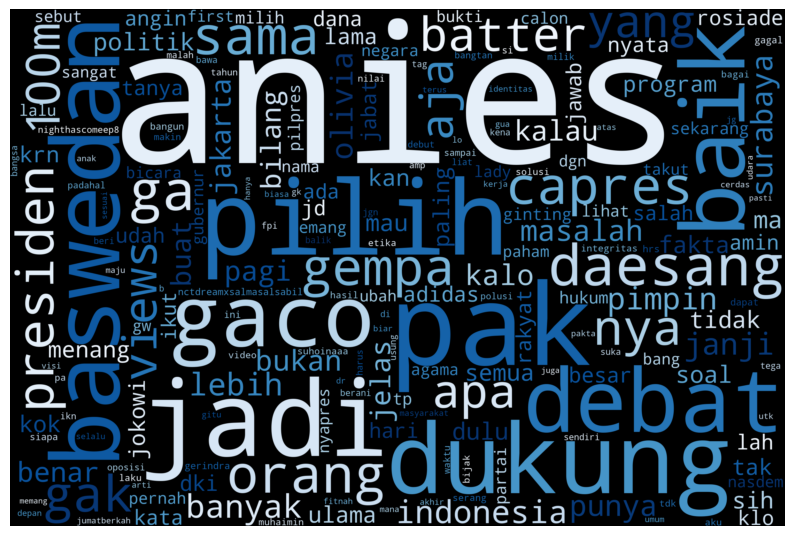

In [45]:
# plot jumlah kata dengan kemunculan yang tinggi
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    
all_words = ' '.join([tweets for tweets in data['full_text']])

wordcloud = WordCloud(colormap='Blues_r',
                      width=3000, 
                      height=2000,
                      random_state=3,
                      collocations=False,
                      stopwords=STOPWORDS,
                      background_color='black').generate(all_words)

plot_cloud(wordcloud)

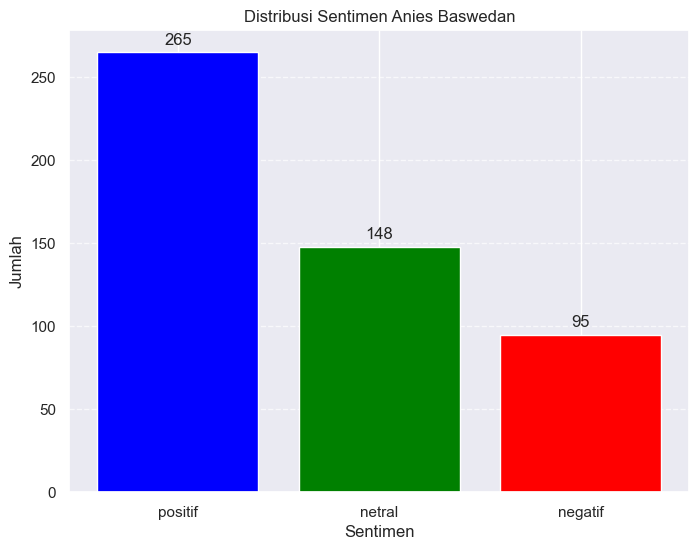

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

labels  = ['positif', 'netral', 'negatif']
counts = [total_positif, total_netral, total_negatif]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    bars = ax.bar(labels, counts, color=['blue', 'green', 'red'])
    
    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords='offset points',
                    ha='center', va='bottom')
        
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)
    
    plt.show()
    
show_bar_chart(labels, counts, 'Distribusi Sentimen Anies Baswedan')


# 6. Klasifikasi Sentimen

In [47]:
data

full_text  \
0                      pram pasti anies punya prestasi   
1    suasana desa memang selalu senang udara segar ...   
2    program anies hanya ubah nama rumah sakit se i...   
3                         anies bohong nipu rasa salah   
4    bicara sesuai fakta anies lantang sebut lampun...   
..                                                 ...   
503  tiga indonesia lebih baik tag gaco daesang oli...   
504  makanya susah paham apa disampaikam anies basw...   
505  buat pak anies bukankah saat kd gubernur dki a...   
506  anies baswedan sosok pimpin paham pimpin bukan...   
507  anies baswedan harap bawa ubah positif tata ke...   

                                         tweet_english klasifikasi  
0                        Pram must have an achievement      netral  
1    The atmosphere of the village is always happy ...     positif  
2    Anies Program only changes the name of a hospi...      netral  
3                    Anies is lying to cheat the fault      netral  
4    Speak according to the facts of Anies Lantang ...      netral  
..                                                 ...         ...  
503  three Indonesia Better Tag Gaco Daesang Olivia...     positif  
504  so it's hard to understand or convey Anies Bas...     negatif  
505  For Mr. Anies, wasn't it when KD Governor of D...     positif  
506  Anies Baswedan, the figure of the leader, is n...     positif  
507  Anies Baswedan, please bring a positive change...     positif  

[508 rows x 3 columns]

In [48]:
dataset = data.drop(['full_text'], axis=1, inplace=False)
dataset = [tuple(x) for x in dataset.to_records(index=False)]

In [54]:
import random

set_positif =[]
set_negatif =[]
set_netral =[]

for n in dataset:
    if (n[1] == 'positif'):
        set_positif.append(n)
    elif(n[1] == 'negatif'):
        set_negatif.append(n)
    else:
        set_netral.append(n)

set_positif = random.sample(set_positif, k=int(len(set_positif)/2))
set_negatif = random.sample(set_negatif, k=int(len(set_negatif)/2))
set_netral = random.sample(set_netral, k=int(len(set_netral)/2))

train = set_positif + set_negatif + set_netral
train_set = []

for n in train:
    train_set.append(n)

In [56]:
# hasil performa
from textblob import TextBlob
from textblob.classifiers import NaiveBayesClassifier
cl = NaiveBayesClassifier(train_set)
print(' Akurasi Test :', cl.accuracy(dataset))

 Akurasi Test : 0.7677165354330708


In [58]:
# labeling hasil training menggunakan bayes
data_tweet = list(data['tweet_english'])
polaritas = 0

status =[]
total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(data_tweet):
    analysis = TextBlob(tweet, classifier=cl)
    
    if analysis.classify() == 'positif':
        total_positif +=1
    elif analysis.classify() == 'netral':
        total_netral +=1
    else:
        total_negatif +=1
        
    status.append(analysis.classify())
    total+=1
    
print(f'\nHasil analisis data :\n Positif = {total_positif}\n Netral = {total_netral}\n Negatif = {total_negatif}')
print(f'\n Total Data : {total}')


Hasil analisis data :
 Positif = 351
 Netral = 115
 Negatif = 42

 Total Data : 508


In [59]:
status = pd.DataFrame({'klasifikasi bayes ': status})
data['klasifikasi_bayes'] = status

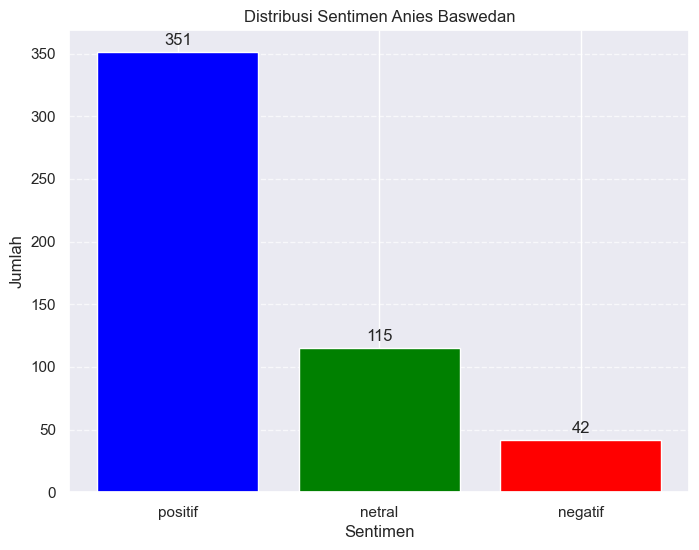

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

labels  = ['positif', 'netral', 'negatif']
counts = [total_positif, total_netral, total_negatif]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    bars = ax.bar(labels, counts, color=['blue', 'green', 'red'])
    
    # menambahkan keterangan presentase
    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), # 3 points vertical offset
                    textcoords='offset points',
                    ha='center', va='bottom')
    
    # menambahkan grid 
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    # menambahkan label sumbu dan judul
    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)
    
    plt.show()
    
show_bar_chart(labels, counts, 'Distribusi Sentimen Anies Baswedan')


In [61]:
data

full_text  \
0                      pram pasti anies punya prestasi   
1    suasana desa memang selalu senang udara segar ...   
2    program anies hanya ubah nama rumah sakit se i...   
3                         anies bohong nipu rasa salah   
4    bicara sesuai fakta anies lantang sebut lampun...   
..                                                 ...   
503  tiga indonesia lebih baik tag gaco daesang oli...   
504  makanya susah paham apa disampaikam anies basw...   
505  buat pak anies bukankah saat kd gubernur dki a...   
506  anies baswedan sosok pimpin paham pimpin bukan...   
507  anies baswedan harap bawa ubah positif tata ke...   

                                         tweet_english klasifikasi  \
0                        Pram must have an achievement      netral   
1    The atmosphere of the village is always happy ...     positif   
2    Anies Program only changes the name of a hospi...      netral   
3                    Anies is lying to cheat the fault      netral   
4    Speak according to the facts of Anies Lantang ...      netral   
..                                                 ...         ...   
503  three Indonesia Better Tag Gaco Daesang Olivia...     positif   
504  so it's hard to understand or convey Anies Bas...     negatif   
505  For Mr. Anies, wasn't it when KD Governor of D...     positif   
506  Anies Baswedan, the figure of the leader, is n...     positif   
507  Anies Baswedan, please bring a positive change...     positif   

    klasifikasi_bayes  
0              netral  
1             positif  
2              netral  
3              netral  
4              netral  
..                ...  
503           positif  
504           positif  
505           positif  
506           positif  
507           positif  

[508 rows x 4 columns]

In [62]:
# ubah bentuk datanya menjadi mudah dimengerti
data_eval = [tuple(x) for x in data.to_records(index=False)]

for n in data_eval:
    if len(n) >= 4:
        if n[2] != n[3]:
            print(f'Text : {n[0]}\nClassifier : {n[2]}\nBayes : {n[3]}\n')
        else:
            print('tuple tidak memiliki cukup elemen')

tuple tidak memiliki cukup elemen
tuple tidak memiliki cukup elemen
tuple tidak memiliki cukup elemen
tuple tidak memiliki cukup elemen
tuple tidak memiliki cukup elemen
Text : sindir anies baswedan apbd paling besar kok mas anies gagal pimpin jakarta gaco anies gempa daesang pagi batter up 100m views pilih baik suhoinaaa nighthascomeep8 nctdreamxsalmasalsabil
Classifier : negatif
Bayes : netral

tuple tidak memiliki cukup elemen
tuple tidak memiliki cukup elemen
tuple tidak memiliki cukup elemen
tuple tidak memiliki cukup elemen
tuple tidak memiliki cukup elemen
tuple tidak memiliki cukup elemen
tuple tidak memiliki cukup elemen
tuple tidak memiliki cukup elemen
tuple tidak memiliki cukup elemen
Text : sindir anies baswedan apbd paling besar kok mas anies gagal pimpin jakarta gaco anies gempa daesang pagi batter up 100m views pilih baik suhoinaaa nighthascomeep8 nctdreamxsalmasalsabil
Classifier : negatif
Bayes : netral

tuple tidak memiliki cukup elemen
tuple tidak memiliki cukup ele

- jika data ketiga capres sudah dibuat dan muncul hasilnya maka akan ada insight

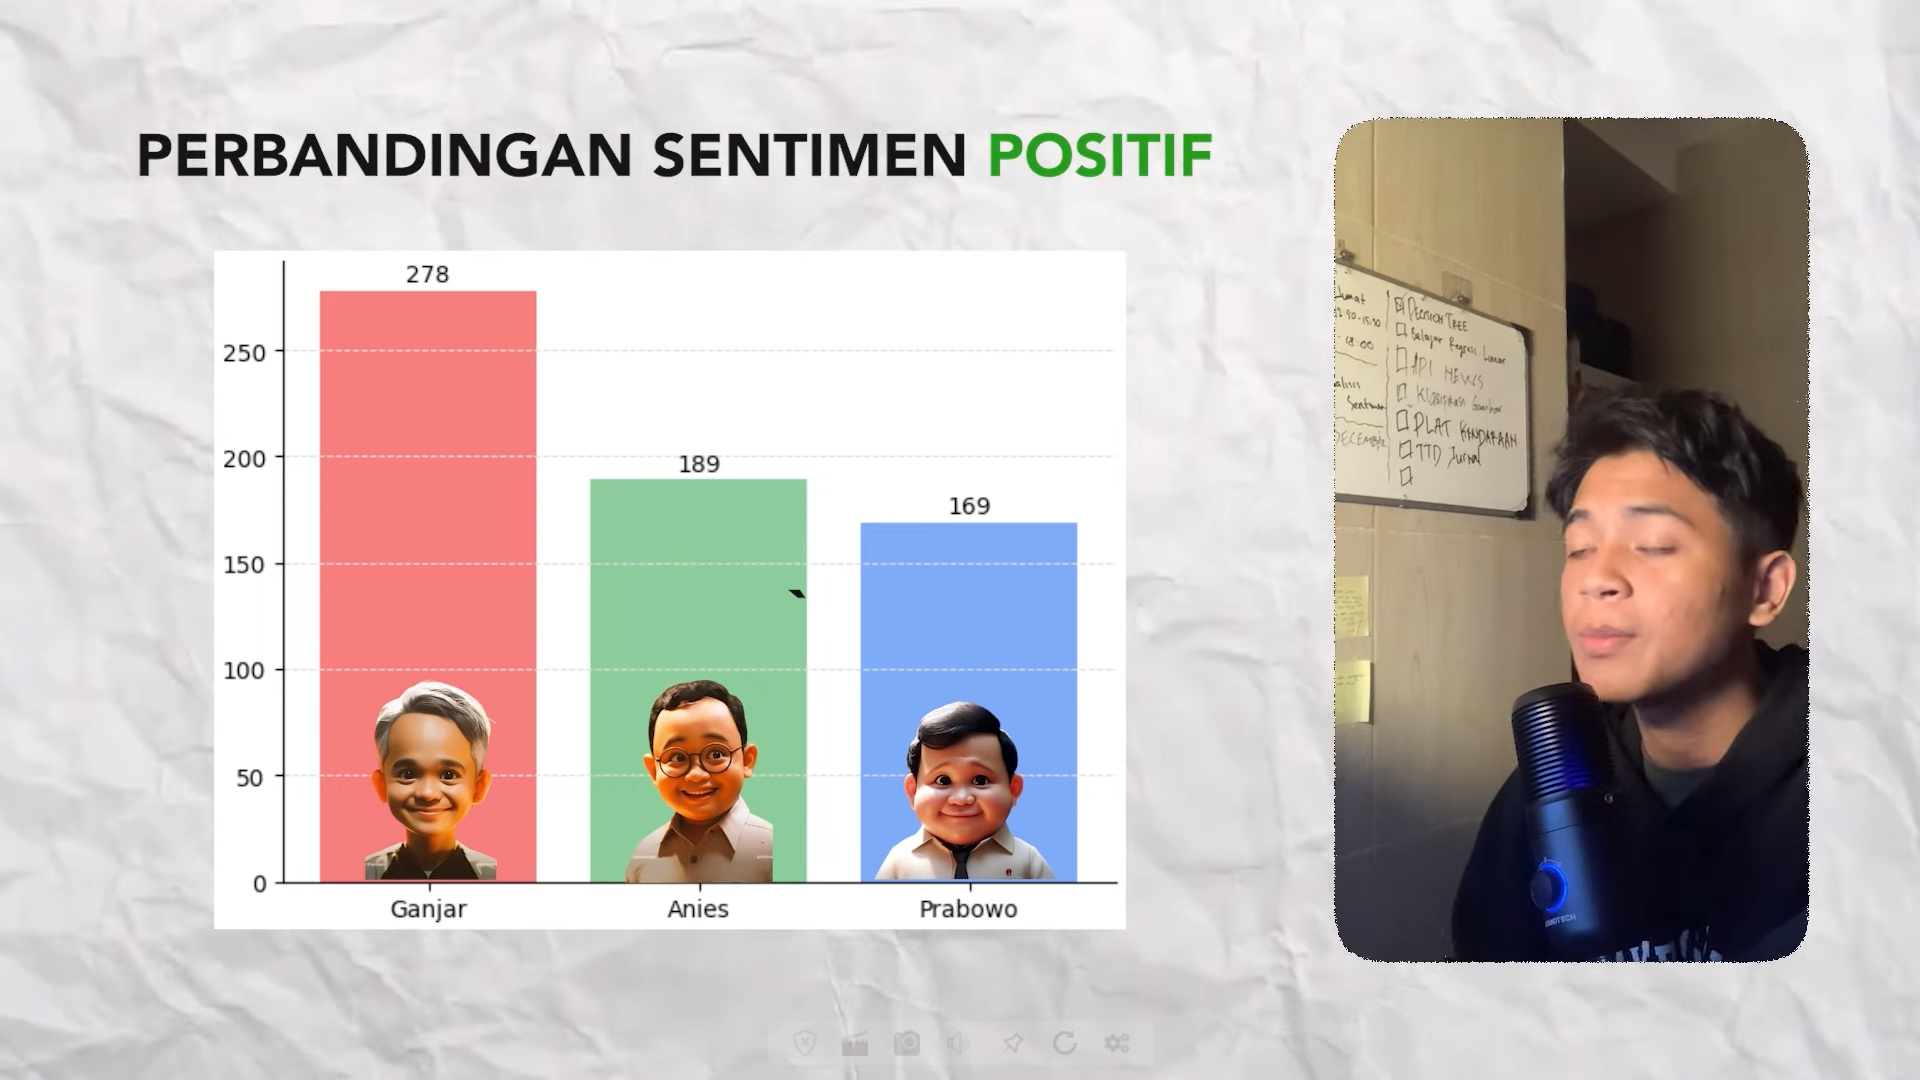

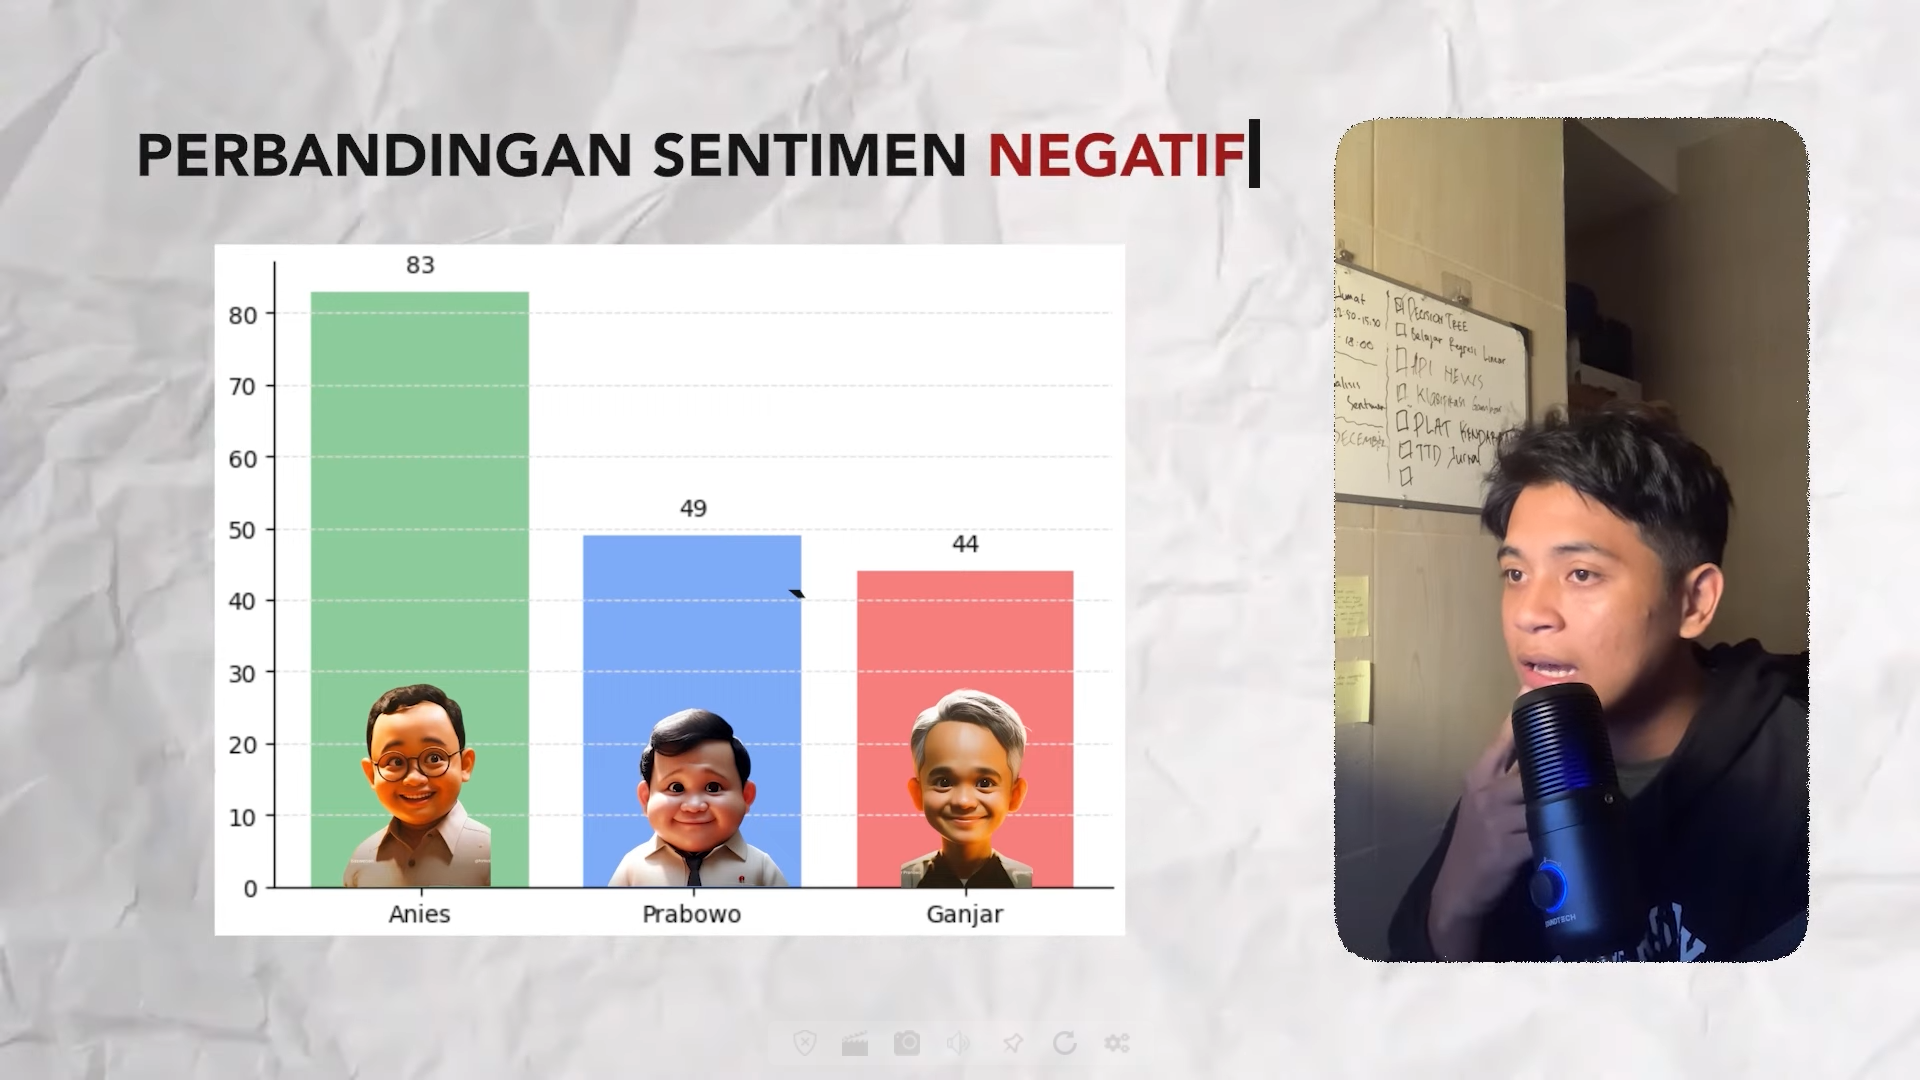

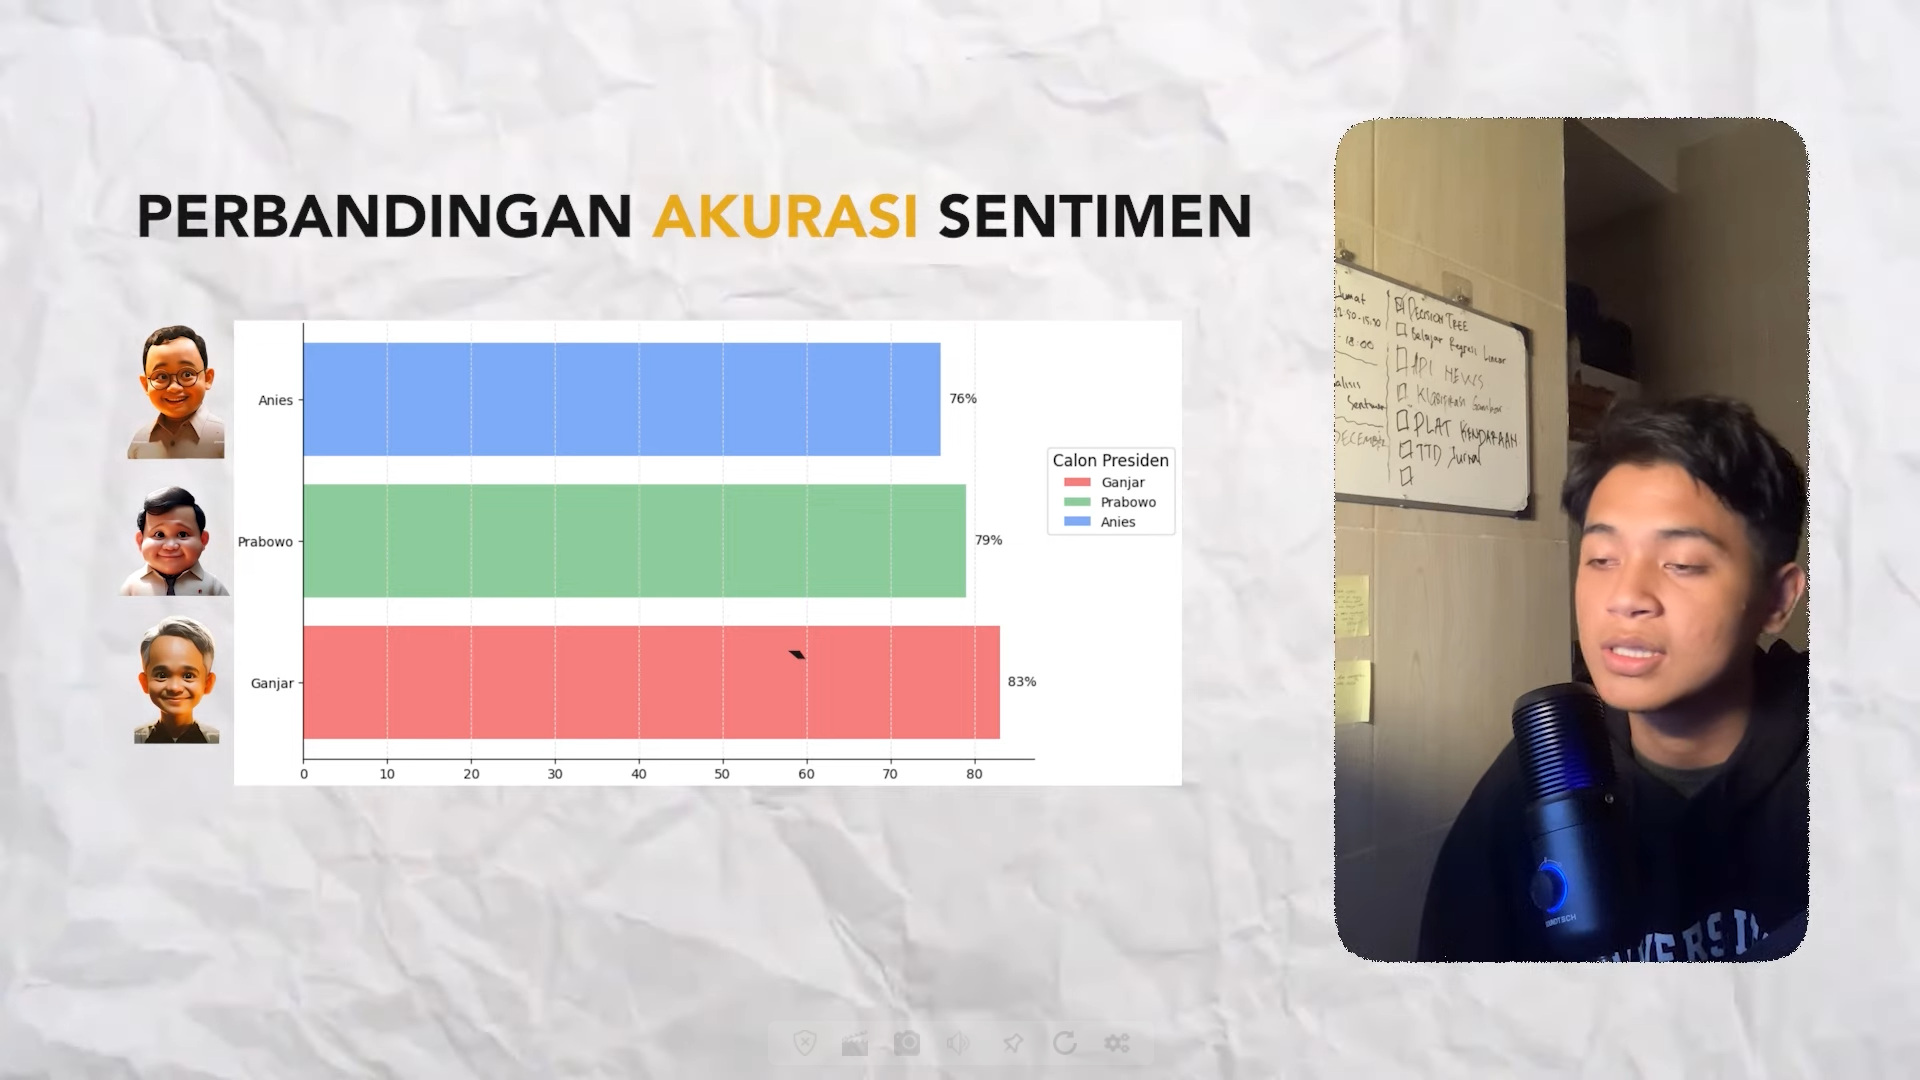